# Pre-processing Medical Images for Deep Learning Models
> This blog is about how to read-understand-preprocess the common medical imaging data formats. <br />Keywords- Medical Imaging, Deep Learning, DICOM, NIFTI, Preprocessing, pydicom, nibabel, tutorial, MICCAI

- toc: true 
- badges: true
- comments: true
- categories: [tutorial]
- image: images/blog_2.jpeg
- author: Akansh Maurya

# About

The seemingly intimidating journey of the Application of AI in Medical Imaging starts with dealing with peculiar file formats. In this blog, we will deal with two data formats that you will deal with more than ninety percent of the time, DICOM and NIFTI.

Unlike other typical formats of images like JPEG, and PNG the Medical imaging community uses a different format(DICOM and NIFTI) because of certain reasons. Medical Images (X-Rays, MRI, CT scans) are generally generated in Hospitals or Scan Centers. Other than image data the scan center collects some other metadata of the subject, this includes gender, age, name, body part examined, etc(We will discuss in a later section). So to share both of these data, Image data and metadata, with researcher like us there exist a standardized data format. DICOM and Nifti are the most common among them. 

![](my_icons/blog_1_image_1.png)


Consider this blog more like a tutorial that will help you to get familiar with the tools used to read-open-write medical imaging files. As this blog is written using [fastpages](https://github.com/fastai/fastpages), you can run this whole tutorial and associated code as a Jupyter notebook.


# DICOM

## What are DICOM files?

According to the Wikipedia, they are:

> Digital Imaging and Communications in Medicine (DICOM) is the standard for the communication and management of medical imaging information and related data.DICOM is most commonly used for storing and transmitting medical images enabling the integration of medical imaging devices such as scanners, servers, workstations, printers, network hardware, and picture archiving and communication systems (PACS) from multiple manufacturers. It has been widely adopted by hospitals and is making inroads into smaller applications such as dentists' and doctors' offices.

In summary: 

- Store Medical image data(**Body**) + Metadata(**Header**) associated with it.
- Used for communication between Medical Imaging devices.
- Widely used in Hospital Atmosphere.

### DICOM Structure

![](my_icons/dicom_structure.png)

## How to Read DICOM files?

We will be using [Pydicom](https://pydicom.github.io/) a python library to read DICOM files.

In [ ]:
#hide
!pip install pydicom
#Write Data code and references
!pip install gdown
!gdown --id 1lV5q9c49Rhb-AssGb9YC5k6G5942pSda
import zipfile
with zipfile.ZipFile("./blog_1_data.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

Lets start with some imports, remember you can run all this code as ipynb notebook on google colab or binder by just clicking "run on colab", present on top of this page. 

Importing: 
- **pydicom**: For reading DICOM files.
- **matplotlib.pyplot**: To plot Medical Images.
- **numpy**: For array manipulation.
- **pathlib**: For easy path handling. 

In [37]:
#Imports
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

### 2-Dimensional(2D) Data

DICOM files can have multiple extentions like .dicom or .dcm. In our case we have .dcm as an extention.<br />
Reading a single file .dcm file using **pydicom.read_file(path)** function.

In [38]:
path2dicom = "./blog_1_data/ID_0000_AGE_0060_CONTRAST_1_CT(1).dcm"
dicom_file = pydicom.read_file(path2dicom)

As discussed in the earlier sections, DICOM files are a combination of medical image data and metadata. To access all the metadata, we can print the DICOM files. Click on **Show Output** to see the print output. 

In [39]:
#collapse-output
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

I know that is a hell lot of metadata. Each entry is accessible by its unique Data Tag. Data tags use hexadecimal encoded identifiers. As an example: 


![](my_icons/Dicom_header.png)

We can call out different using the following code: 

Note: The 0x in front of the identifier tells the python code to treat the data tag values as hexadecimal.

In [5]:
#collapse-output
print(dicom_file[0x0028, 0x0100])
print(dicom_file[0x0028, 0x0010])
print(dicom_file[0x0018, 0x0015])

(0028, 0100) Bits Allocated                      US: 16
(0028, 0010) Rows                                US: 512
(0018, 0015) Body Part Examined                  CS: 'CHEST'


There is also an alternative method or one can say more direct way to access various metadata values from your DICOM file. To do so we can treat the loaded DICOM file as an object and can access the metadata values as variables. See the example below: 

> Please note the lettering: 'Body Part Examined' becomes 'BodyPartExamined' (so-called Pascal Case).

In [6]:
#collapse-output
print("Bits Allocated:" ,dicom_file.BitsAllocated)
print("Rows:" ,dicom_file.Rows)
print("Body Part Examined:", dicom_file.BodyPartExamined)

Bits Allocated: 16
Rows: 512
Body Part Examined: CHEST


After going through the metadata lets access the actual(image) data from the dicom file. This is done using the **pixel_array**.

This image data is numpy array. We can print its type and size.

In [73]:
ct_image_data = dicom_file.pixel_array
print("Type of CT Image data:", type(ct_image_data))
print("Size of CT Image data:", ct_image_data.shape)

Type of CT Image data: <class 'numpy.ndarray'>
Size of CT Image data: (512, 512)


Let's plot the image using Matplotlib.pyplot to have a visual inspection of the CT image data.

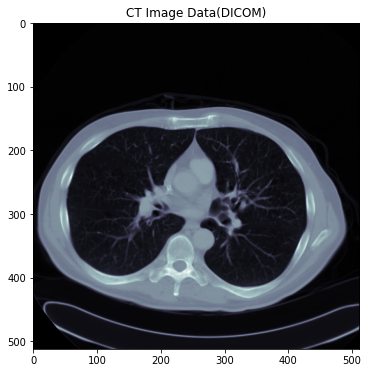

In [66]:
#hide_input
plt.figure(figsize = (6,6))
plt.imshow(ct_image_data, cmap = "bone")
plt.title("CT Image Data(DICOM)");

### 3-Dimensional(3D) Data

In the previous section, we learned how to read the DICOM file. Essentially we read a slice of a CT scan. Usually CT scans and MRI are 3D data, their shape is of (HxWxD) format. In this section, we will take learn how to read and understand 3D data stored as multiple 2D DICOM files. 

We will use **Path** function form pathlib to define the path of the Dicom folder. Then we will use glob function with ("*") to list all the files present inside the folder. 

In [40]:
#collapse-output
path2dicom = Path("./blog_1_data/SE000001/")
all_files = list(path2dicom.glob("*"))
all_files

[PosixPath('blog_1_data/SE000001/MR000019'),
 PosixPath('blog_1_data/SE000001/MR000013'),
 PosixPath('blog_1_data/SE000001/MR000018'),
 PosixPath('blog_1_data/SE000001/MR000002'),
 PosixPath('blog_1_data/SE000001/MR000010'),
 PosixPath('blog_1_data/SE000001/MR000017'),
 PosixPath('blog_1_data/SE000001/MR000005'),
 PosixPath('blog_1_data/SE000001/MR000026'),
 PosixPath('blog_1_data/SE000001/MR000020'),
 PosixPath('blog_1_data/SE000001/MR000014'),
 PosixPath('blog_1_data/SE000001/MR000025'),
 PosixPath('blog_1_data/SE000001/MR000007'),
 PosixPath('blog_1_data/SE000001/MR000003'),
 PosixPath('blog_1_data/SE000001/MR000023'),
 PosixPath('blog_1_data/SE000001/MR000006'),
 PosixPath('blog_1_data/SE000001/MR000008'),
 PosixPath('blog_1_data/SE000001/MR000022'),
 PosixPath('blog_1_data/SE000001/MR000012'),
 PosixPath('blog_1_data/SE000001/MR000001'),
 PosixPath('blog_1_data/SE000001/MR000024'),
 PosixPath('blog_1_data/SE000001/MR000015'),
 PosixPath('blog_1_data/SE000001/MR000016'),
 PosixPath

Lets read one slice of the MRI usinf **read_file** function. and print the metadata.

In [59]:
#collapse-output
one_mri_slice = pydicom.read_file(all_files[14])
print(one_mri_slice)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 214
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413270093711
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.114089.1.0.0.3.3.38
(0002, 0013) Implementation Version Name         SH: 'DCF 3.3.38c'
(0002, 0016) Source Application Entity Title     AE: 'DCF'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20150114'
(0008, 0013) Instance Creation Time              TM: '132938'
(0008, 0014) Insta

We can also plot this slice. 

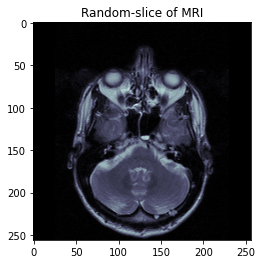

In [60]:
#hide_input
one_mri_slice_data = one_mri_slice.pixel_array
plt.imshow(one_mri_slice_data, cmap = 'bone');
plt.title("Random-slice of MRI");

Now we will read these files by using the read_file method and append them to a list.

In [72]:
full_mri = []
for i in all_files:
    data = pydicom.read_file(i)
    full_mri.append(data)
print(f"There are {len(full_mri)} slices in our MRI.")

There are 27 slices in our MRI.


> Important: Pay attention! This is important.

While appending slices in **full_mri** list we appended them in random fashion. All the slices should be in right order. To view the slice location of the MRI we can use **SliceLocation**. The current slice order is radndom and can be verified by inspecting the SliceLocation shown below:

In [17]:
#collapse-output
for i in full_mri:
    print(i.SliceLocation)

113.999995959439
77.9999962275740
107.999995419197
11.9999973042441
59.9999962290673
101.999994745866
29.9999952815023
155.999992554172
119.999996566542
83.9999967682912
149.999999502083
41.9999963629367
17.9999979772582
137.999998321624
35.9999959546749
47.9999970362677
131.999997780749
71.9999961590453
5.99999663091323
143.999998928727
89.9999955528687
95.9999960937442
0.0
65.9999961939969
53.9999958207213
23.9999946081714
125.999997173645


It is crucial to order them, otherwise the scan will be shuffled for no reason and can be a problem for visualization and for further analysis.

To correct this, we will sort the **mri_data** list using the **SliceLocation**. This can be done by the following code:

In [65]:
mri_data_ordered = sorted(full_mri, key=lambda x: x.SliceLocation) 

Corrected MRI Slice Order:

In [67]:
#collapse-output
for i in mri_data_ordered:
    print(i.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714
29.9999952815023
35.9999959546749
41.9999963629367
47.9999970362677
53.9999958207213
59.9999962290673
65.9999961939969
71.9999961590453
77.9999962275740
83.9999967682912
89.9999955528687
95.9999960937442
101.999994745866
107.999995419197
113.999995959439
119.999996566542
125.999997173645
131.999997780749
137.999998321624
143.999998928727
149.999999502083
155.999992554172


Now, lets move ahead and extract the actual Image data from the **mri_data** list. We will again use the **.pixel_array** to get the image content of the slice and then append it to the **full_volume** list. 

In [68]:
full_volume = []
for slice in mri_data_ordered:
    full_volume.append(slice.pixel_array)
full_volume = np.array(full_volume)

Lets print the shape!

In [69]:
print(full_volume.shape)

(27, 256, 256)


And now we can have look at few slices of the 3D Volume. We can plot this both in 2D and 3D way.

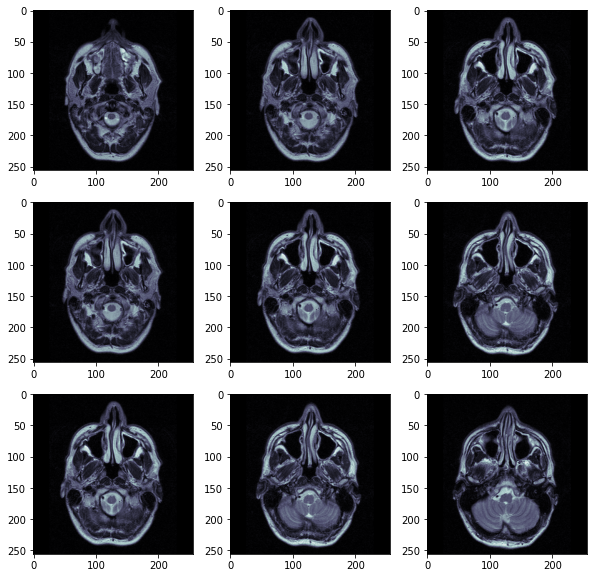

In [70]:
#hide_input
fig, axis = plt.subplots(3,3, figsize = (10,10))
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[i+j], cmap = 'bone'); 

Animated GIF!

In [ ]:
#hide
!pip install celluloid
from celluloid import Camera
from IPython.display import HTML
%matplotlib inline
fig = plt.figure()
camera = Camera(fig) 
for i in range(len(full_volume)):  
    plt.imshow(full_volume[i], cmap="bone")
    camera.snap() 
animation = camera.animate();

In [24]:
#hide_input
HTML(animation.to_html5_video())

# NIfTI

![](my_icons/nifti.png)

## What are NIfTI files?

Another popular and widely used data file extension in medical imaging is NIfTI. It is an acronym for Neuroimaging Informatics Technology Initiative. These are [open file formats](https://en.wikipedia.org/wiki/Open_file_format) for the storage of medical image data. They were initially used for neuroimaging, a branch of medical imaging that focuses on the brain, but are now used for other radiological images too.

### NIfTI Structure

- Similar to DICOM files, NIfTI files have two components those are **Header** and **Body.** The header contains the metadata, but unlike DICOM files, the header of NIfTI has only necessary metadata. The body of NIfTI contains the actual image data(2D, 3D, 4D, etc.)
- NIfTI files are more popular in research settings than in hospital standards.
- File extension is “.nii” or “.nii-gz”. The prior extension refers to a compressed version.
- In general they are easier to handle.

You can read more about NIfTI files [here](https://brainder.org/2012/09/23/the-nifti-file-format/).

## How to read NIfTI file?

There are multiple python libraries that can handle NIfTI files. We will use [Nibabel](https://nipy.org/nibabel/) for our purpose. 
Lets start with some imports, remember you can run all this code as ipynb notebook on google colab or binder by just clicking "run on colab", present on top of this page.

In [ ]:
#hide
!pip install nibabel -U

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

We can read the NIfTI file in nibabel using **nib.load(path)** function.

In [2]:
path2nifti = "./blog_1_data/BraTS20_Training_001_flair.nii"
mri_nifti = nib.load(path2nifti)

Just like DICOM files NIfTI files also carries metadata but only the necessary one. To access the metadata, we can print the NIfTI file. Click on Show Output to see the output.

In [3]:
#collapse-output
print(mri_nifti);

<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine: 
[[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b   

Each entry is accessible by using header object in the NIfTI. 

In [12]:
#collapse-output
print(mri_nifti.header['qoffset_y'])
print(mri_nifti.header['sizeof_hdr'])
print(mri_nifti.header['pixdim'])

239.0
348
[1. 1. 1. 1. 0. 0. 0. 0.]


We can find the shape of image data using **.shape**

In [38]:
print("Shape of MRI:", mri_nifti.shape)

Shape of MRI: (240, 240, 155)


After going through the metadata lets access the actual(image) data from the NIfTI file. This is done using the **get_fdata**. <br />
Just like in dicom files the image data stored is a Numpy array. We can print the size and type.

In [6]:
mri_image_data = mri_nifti.get_fdata()
print("Type of MRI Image data:", type(mri_image_data))
print("Shape of MRI Array:", mri_image_data.shape)

Type of MRI Image data: <class 'numpy.memmap'>
Shape of MRI Array: (240, 240, 155)


Lets plot the Image data. As the image is an MRI(3D) we have to plot it as GIF.  

In [ ]:
#hide
from celluloid import Camera
from IPython.display import HTML
%matplotlib inline
fig = plt.figure()
camera = Camera(fig) 
for i in range(mri_image_data.shape[-1]):  
    plt.imshow(mri_image_data[:,:,i], cmap="bone")
    camera.snap() 
animation = camera.animate();

In [42]:
#hide_input
HTML(animation.to_html5_video())

### Affine Array and Orientation

All these Medical images(CT scans, MRI, X-RAYs) are represenation of some reference space to digital space. An affine array is an array that tells you the position of the image array data in a reference space. Discussion about the affine matrix is out of the scope of this blog. But I would strongly recommend you to read this [article on the coordinate systems and affine](https://nipy.org/nibabel/coordinate_systems.html) for more information. Another great blog will be [Understanding coordinate systems and DICOM for deep learning medical image analysis](https://theaisummer.com/medical-image-coordinates/) by Nikolas Adaloglou.

To access the affine array of the medical image in NIfTI, we use **.affine** command.

In [9]:
print("The affine Matrix of the MRI Image:\n", mri_nifti.affine)

The affine Matrix of the MRI Image:
 [[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


Through this Affine Array we can access the orinetation of our Medical imaging data in coordicate space. This can be done using **nib.aff2axcodes(Affine Array)**

In [11]:
print("Orientation of MRI Image:", nib.aff2axcodes(mri_nifti.affine))

Orientation of MRI Image: ('L', 'P', 'S')


The orientation of Image can be "LPS" or "RAS". The meaning of them are as follows: 
![](my_icons/LPS_RAS.png "Credit: https://theaisummer.com/medical-image-coordinates/")

Later in pre-processing steps while building Machine/Deep Learning model we ensure that all the data we are geting is of same orientation. Usually the problem of jumble orientation among medical images happen when the data is from multiple sources/scanners.

## DICOM to NIfTI Conversion

NIfTI files are easy to handle as compared to DICOM files, especially in the case of 3D data. In DICOM, usually, 3D data is stored in multiple files, where each file represents one slice of the data. Therefore it makes them difficult to handle.

In this section, we will learn how to convert DICOM to NIfTI using another python library called [dicom2nifti](https://github.com/icometrix/dicom2nifti). This library is straightforward and easy to use.

In [ ]:
#hide
!pip install dicom2nifti
from pathlib import Path
import os

First we will import the library and define the path to dicom directory.

In [21]:
import dicom2nifti
path2dicom = "./blog_1_data/SE000001/"

To covert the dicom2nifti we will use **.convert_directory(path_to_dicom, save_directory)** function that take two inputs, path of dicom and save directory.

In [22]:
dicom2nifti.convert_directory(path2dicom, "./blog_1_data/")

We can further confirm the conversion by reading the converted file using nibabel.

In [26]:
#collapse-output
path2nifti_from_dicom = "./blog_1_data/201_t2w_tse.nii.gz"
nifti_from_dicom = nib.load(path2nifti_from_dicom)
print(nifti_from_dicom)
print(nifti_from_dicom.shape)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine: 
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

## Writing NIfTI files

Nibabel also provide us with function to save an data into NIfTI format. This is usefull when you want to perform some pre-processing and then later save it back to NIfTI. In below example, we will load a NIfTI image and perform some simple processing and then save it back to ".nii-gz" format. 

We will perform simple threasholding using the following code and then plot them.

In [27]:
nifti_from_dicom_data = nifti_from_dicom.get_fdata()
new_nifti_data = nifti_from_dicom_data * (nifti_from_dicom_data > 300)

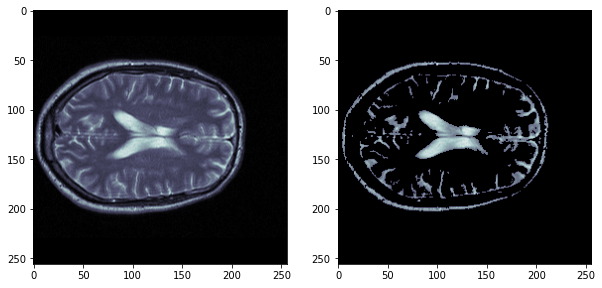

In [28]:
#hide_input
fig, axis = plt.subplots(1, 2, figsize=(10, 10))

axis[0].imshow(nifti_from_dicom_data[:,:,15], cmap = 'bone');
axis[1].imshow(new_nifti_data[:,:,15], cmap = 'bone');


To convert the image data into NIfTI file, we have to use affine array along with new image data. We will use **nib.Nifti1Image(new_image_Data, affine_array)**. We will later save the file using **nib.save(nifti_file, path)**.

In [45]:
processed_nifti = nib.Nifti1Image(new_nifti_data, nifti_from_dicom.affine)
nib.save(processed_nifti, './blog_1_data/201_t2w_tse_processed.nii.gz')

Congratulations! You made it! Now you understand how to read most popular medical imaging formats(DICOM and NIfTI). By following this notebook you also learned how to manipulate and visualize these images. 

# References

- Nibabel: https://nipy.org/nibabel/coordinate_systems.html
- Dataset: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
- pyDicom: https://pydicom.github.io/
- Dataset: https://www.kaggle.com/kmader/siim-medical-images?select=dicom_dir


# About Me:
I am Akansh maurya, working as a post-bacc at Robert Bosch Center of Data Science and AI, Indian Institute of Technology(IIT), Madras. 

> <a href="https://twitter.com/akansh_maurya?ref_src=twsrc%5Etfw" class="twitter-follow-button" data-show-count="false">Follow @akansh_maurya</a><script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Consider joining our Slack channel for discussion, tutorials, talks and, new research in Deep learning and Medical Imaging.